## 5. CRISP-DM: Modeling

## Training and Evaluation

10446
Class distribution in y_train after SMOTE:
WnvPresent
1    6922
0    6922
Name: count, dtype: int64


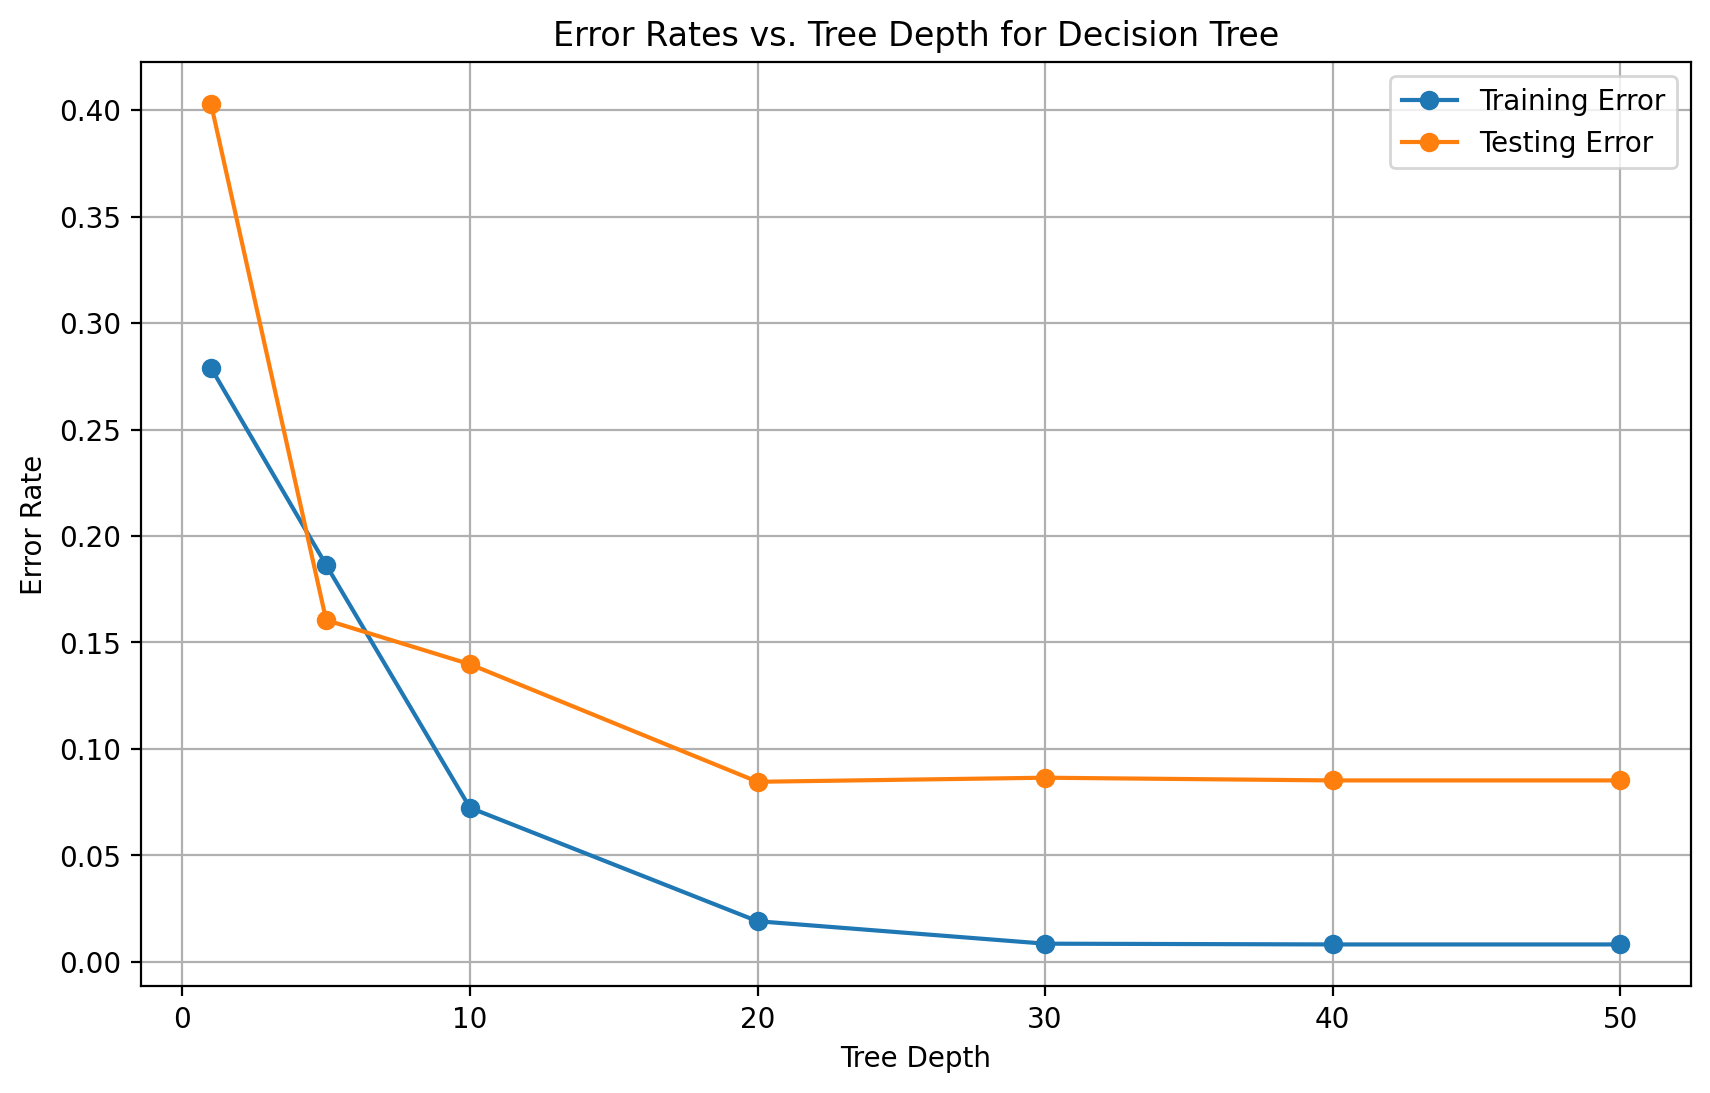

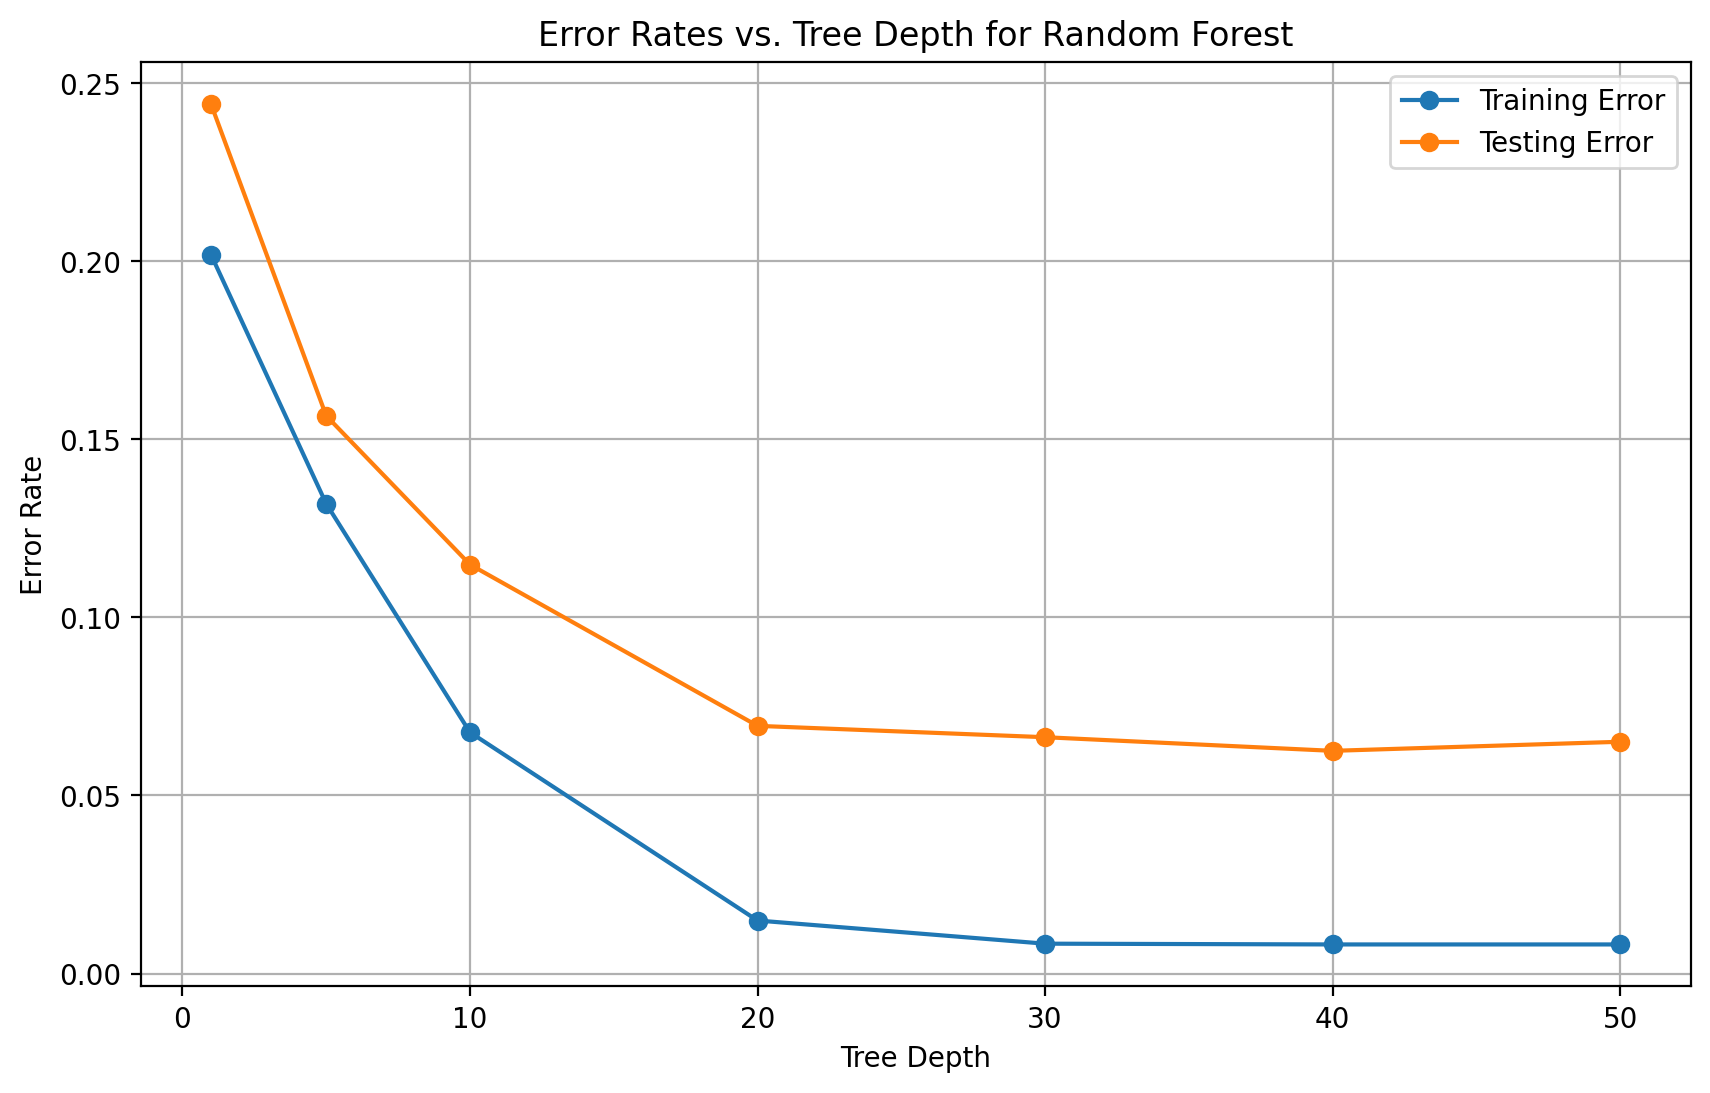

Tuning Majority Classifier
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\dummy.py", line 216, in fit
    raise ValueError(
ValueError: Constant target value has to be specified when t

Best parameters for DummyClassifier: {'strategy': 'most_frequent'}
Tuning Logistic Regression
Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\s

Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Tuning Decision Tree
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for DecisionTreeClassifier: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20}
Tuning Random Forest
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestClassifier: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


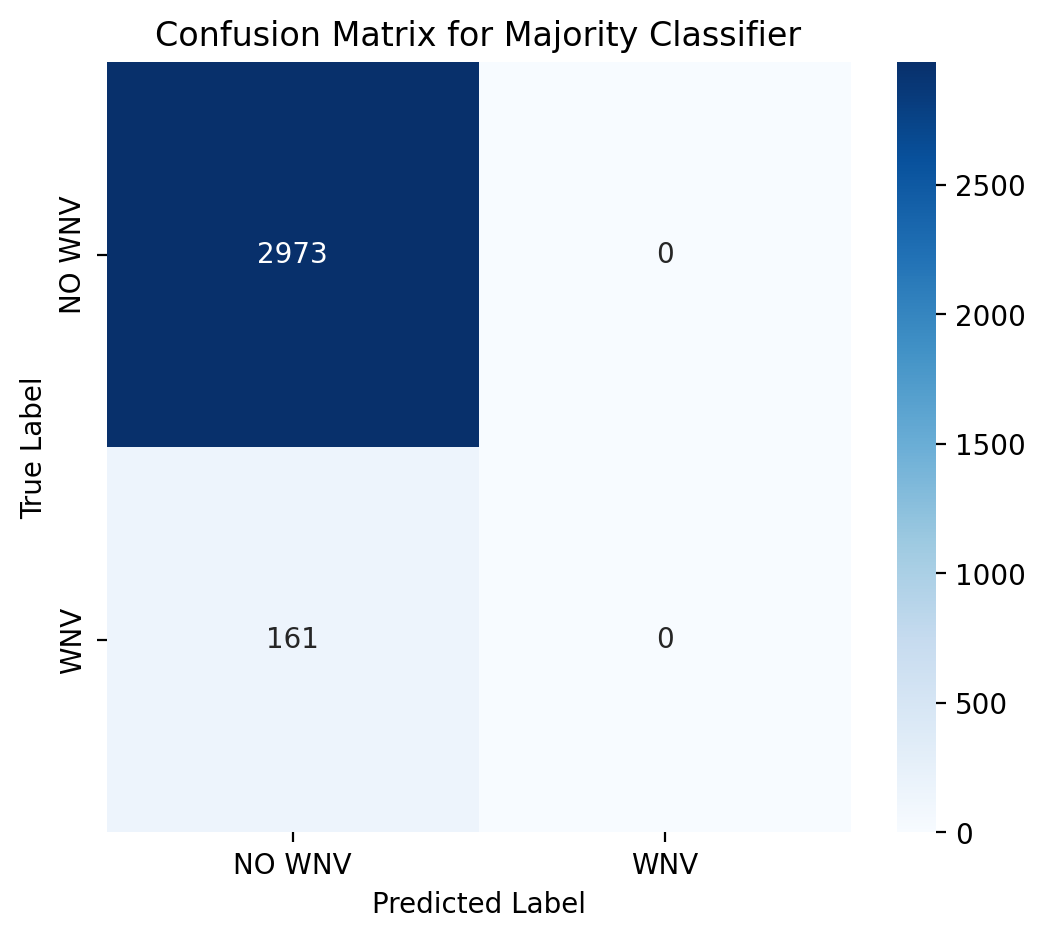

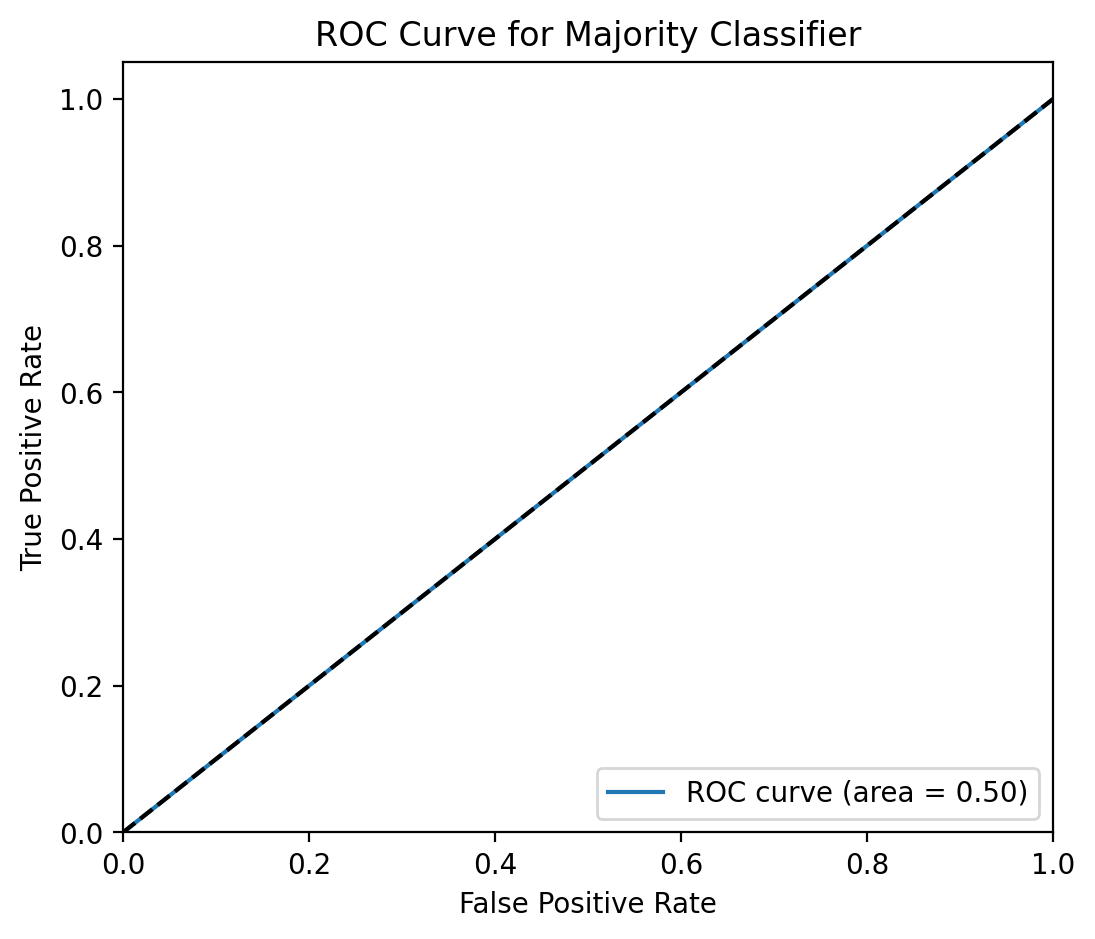

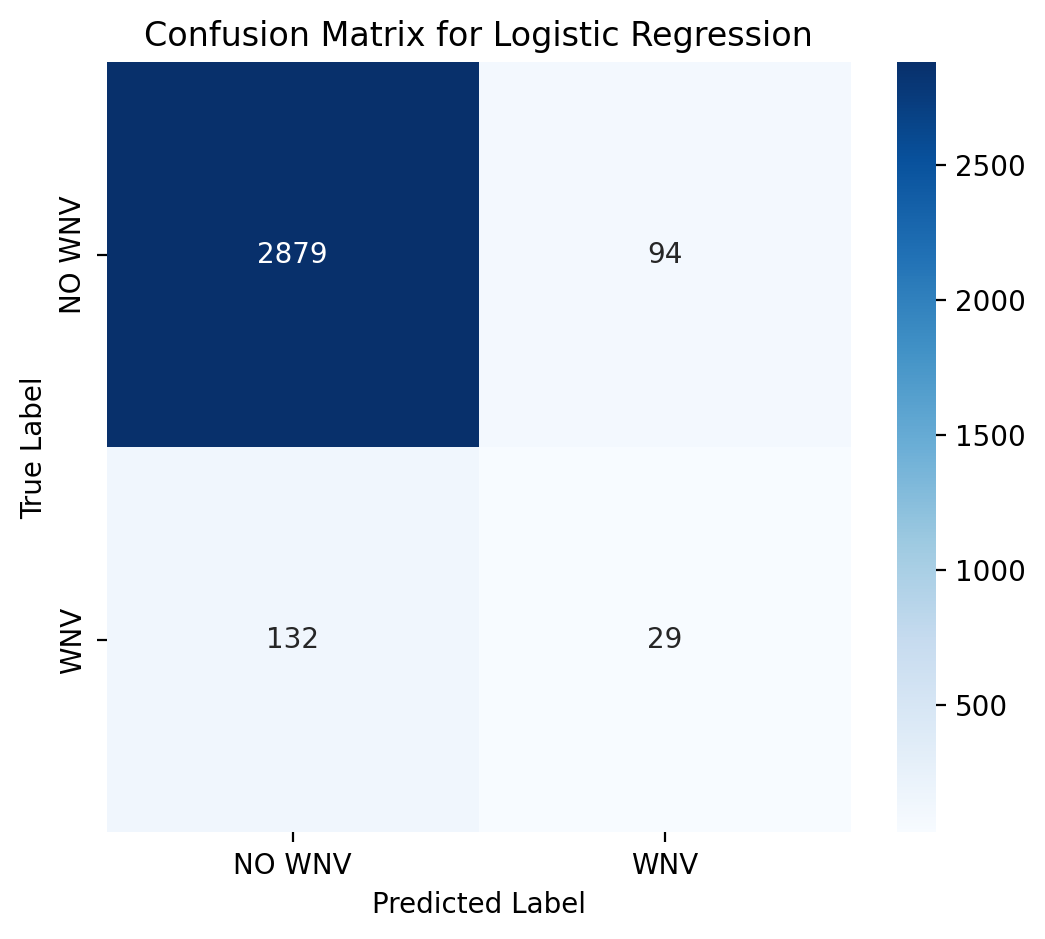

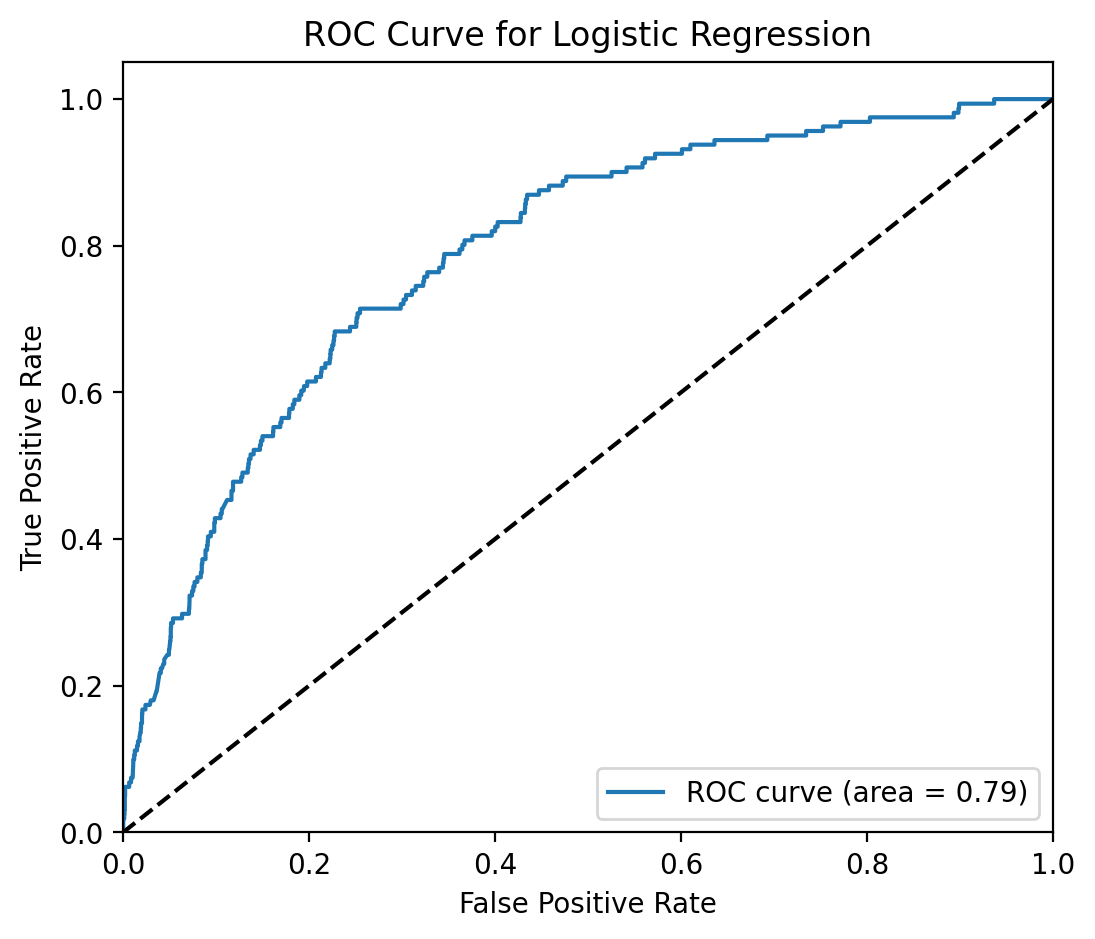

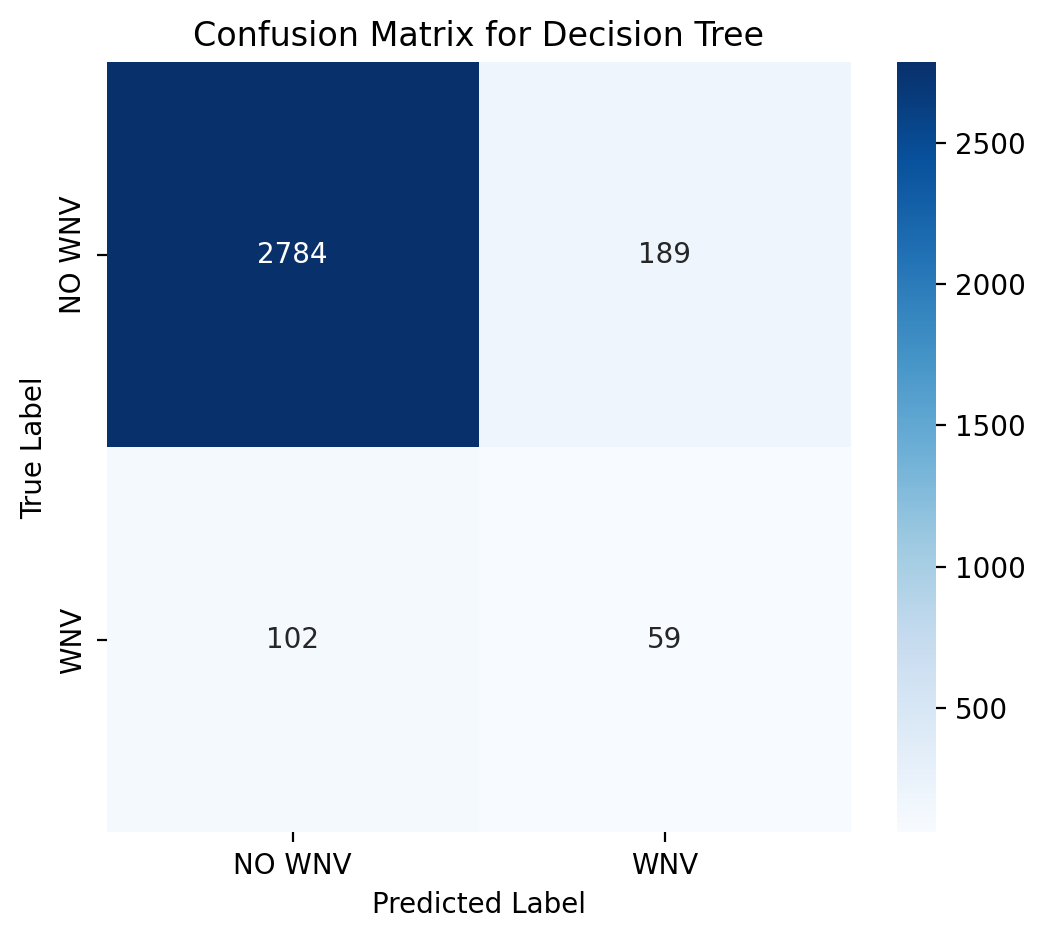

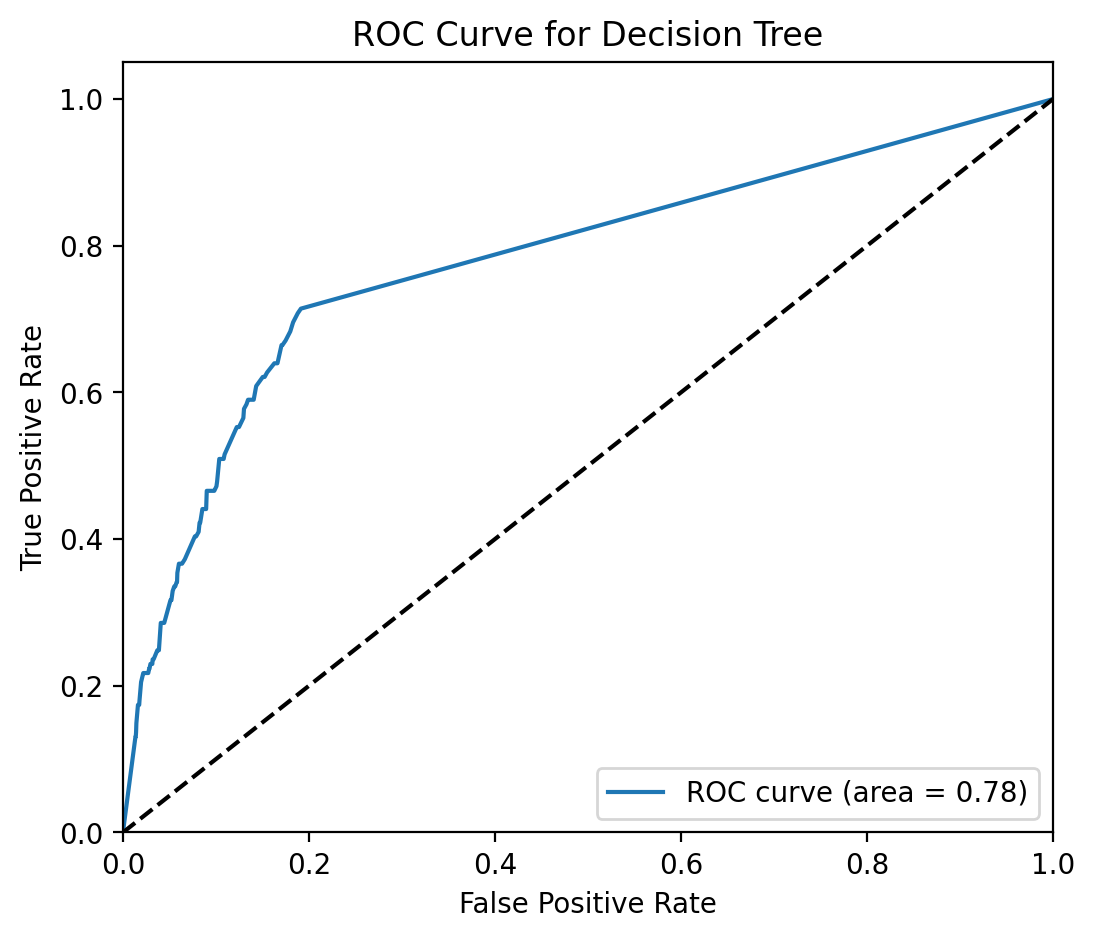

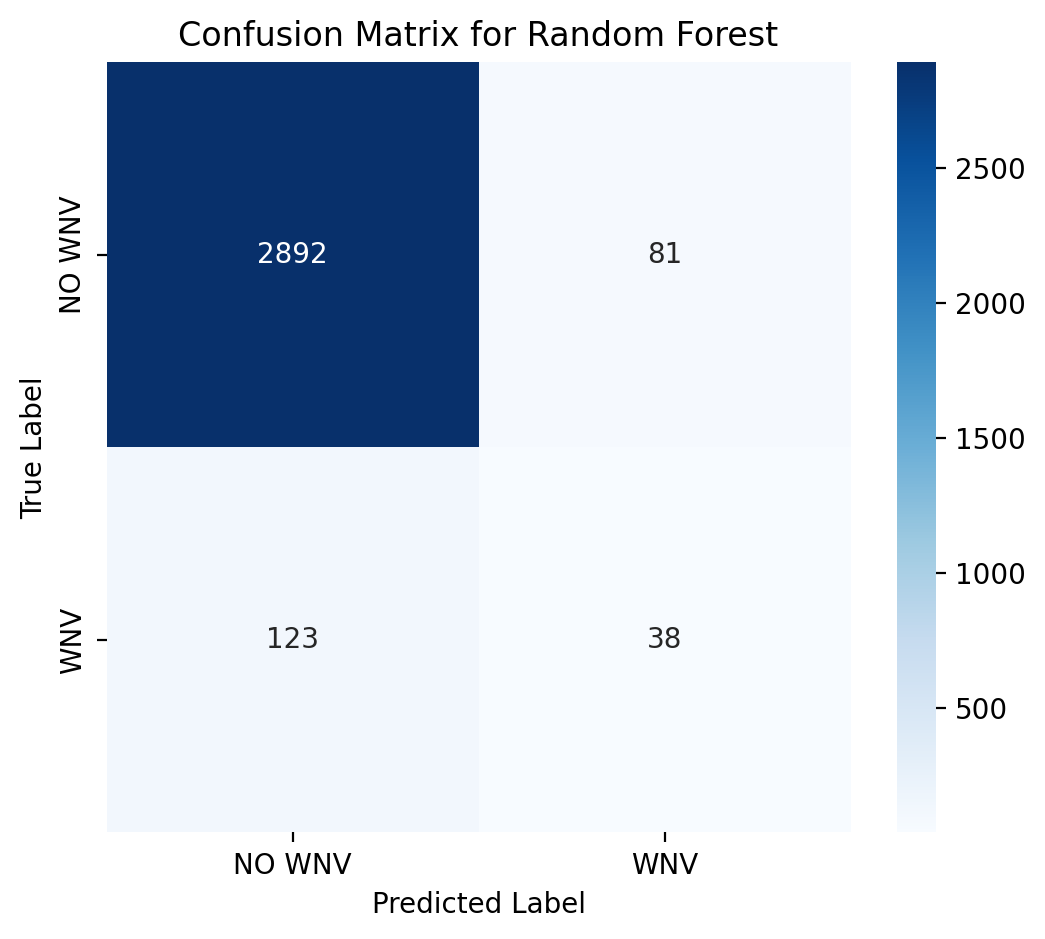

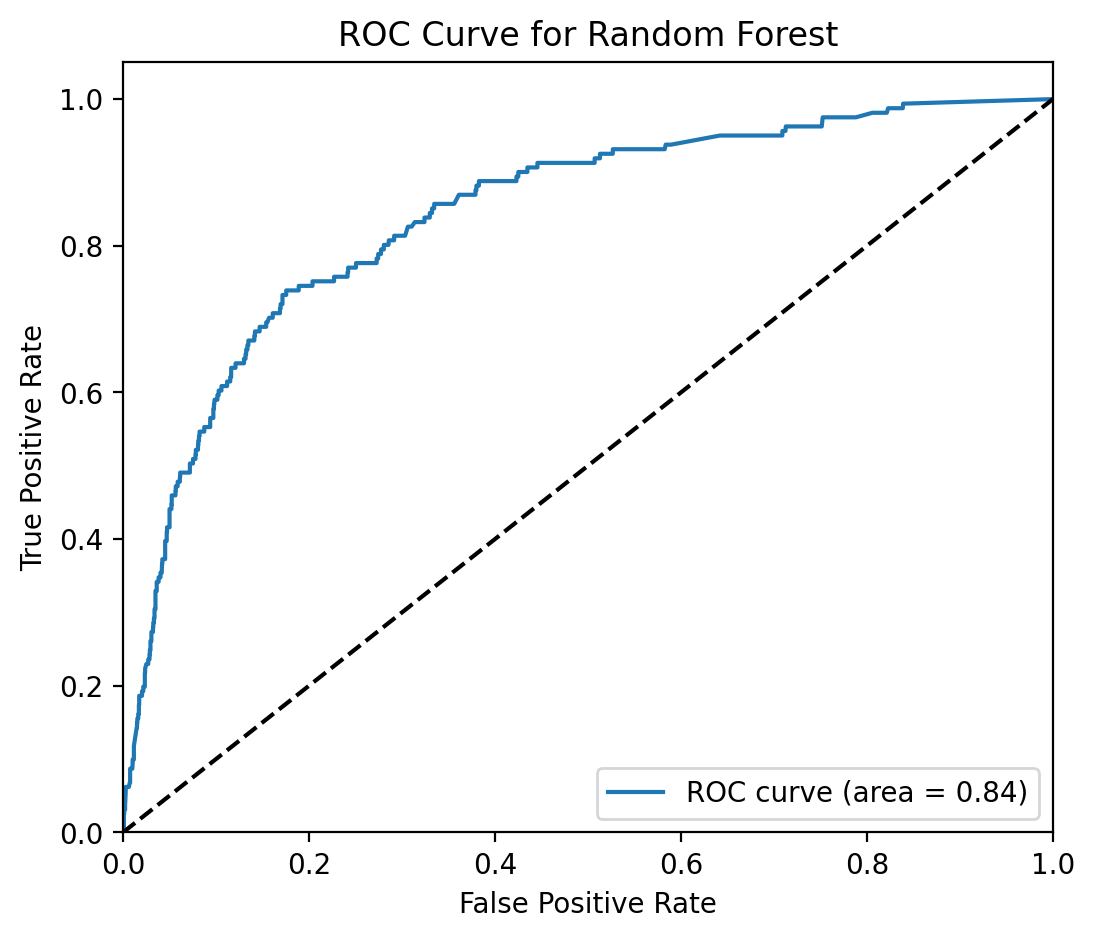

,Accuracy,ROC AUC
Majority Classifier,0.948628,0.500000
Logistic Regression,0.927888,0.788409
Decision Tree,0.907147,0.777880
Random Forest,0.934907,0.842155


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score, auc
import seaborn as sns
from IPython.display import display, Markdown
from imblearn.over_sampling import SMOTE

# Settings for plotting
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'  # High resolution figures")

def prepare_data_for_modeling(train, useSmote):
    X = train.drop(["WnvPresent"], axis=1)
    y = train['WnvPresent']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    if(useSmote):
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    print("Class distribution in y_train after SMOTE:" if useSmote else "Class distribution in y_train:")
    print(y_train.value_counts())

    return X_train, X_test, y_train, y_test

def prepare_models():
    models = {
        'Majority Classifier': DummyClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    return models

def train_models(models, X_train, y_train):
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models


def evaluate_models(trained_models, X_test, y_test):
    results = {}
    class_names = ['NO WNV', 'WNV']
    
    for name, model in trained_models.items():
        try:
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
            accuracy = accuracy_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'
            results[name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}
        
            plt.figure(figsize=(6, 5))
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
            plt.title(f'Confusion Matrix for {name}')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()


            if y_prob is not None:
                plt.figure(figsize=(6, 5))
                fpr, tpr, thresholds = roc_curve(y_test, y_prob)
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], 'k--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {name}')
                plt.legend(loc="lower right")
                plt.show()
        except Exception as e:
            print(f"Error occurred when evaluating {name}: {e}")
            results[name] = {'Accuracy': 'N/A', 'ROC AUC': 'N/A'}
    return pd.DataFrame(results).T


param_grids = {
    'Majority Classifier': {
        'strategy': ['most_frequent', 'stratified', 'uniform', 'constant'],
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [5, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 5]
    }
}

def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_


def plot_fitting_graph(X_train, y_train, X_test, y_test, depths, model_type='random_forest'):
    train_errors = []
    test_errors = []

    for depth in depths:
        if model_type == 'decision_tree':
            model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        elif model_type == 'random_forest':
            model = RandomForestClassifier(max_depth=depth, random_state=42, n_estimators=100)
        else:
            raise ValueError("model_type must be either 'decision_tree' or 'random_forest'")

        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_errors.append(1 - accuracy_score(y_train, train_pred))  # Error rate
        test_errors.append(1 - accuracy_score(y_test, test_pred))  # Error rate

    plt.figure(figsize=(10, 6))
    plt.plot(depths, train_errors, label='Training Error', marker='o')
    plt.plot(depths, test_errors, label='Testing Error', marker='o')
    plt.xlabel('Tree Depth')
    plt.ylabel('Error Rate')
    plt.title(f'Error Rates vs. Tree Depth for {model_type.replace("_", " ").title()}')
    plt.legend()
    plt.grid(True)
    plt.show()




display(Markdown("## Training and Evaluation"))


train_cleaned = pd.read_csv('../data/cleaned_train_encoded.csv')
print(len(train_cleaned))

X_train, X_test, y_train, y_test = prepare_data_for_modeling(train_cleaned, True)
plot_fitting_graph(X_train, y_train, X_test, y_test, [1, 5, 10, 20, 30, 40, 50], model_type='decision_tree')
plot_fitting_graph(X_train, y_train, X_test, y_test, [1, 5, 10, 20, 30, 40, 50], model_type='random_forest')

models = prepare_models()
trained_and_tuned_models = {}

for model_name, model in models.items():
    if model_name in param_grids:
        print(f"Tuning {model_name}")
        best_model = hyperparameter_tuning(model, param_grids[model_name], X_train, y_train)
        trained_and_tuned_models[model_name] = best_model
    else:
        print(f"No parameters to tune for {model_name}")
        trained_and_tuned_models[model_name] = model

results_df = evaluate_models(trained_and_tuned_models, X_test, y_test)
display(results_df)


10446
Class distribution in y_train:
WnvPresent
0    6922
1     390
Name: count, dtype: int64


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
          

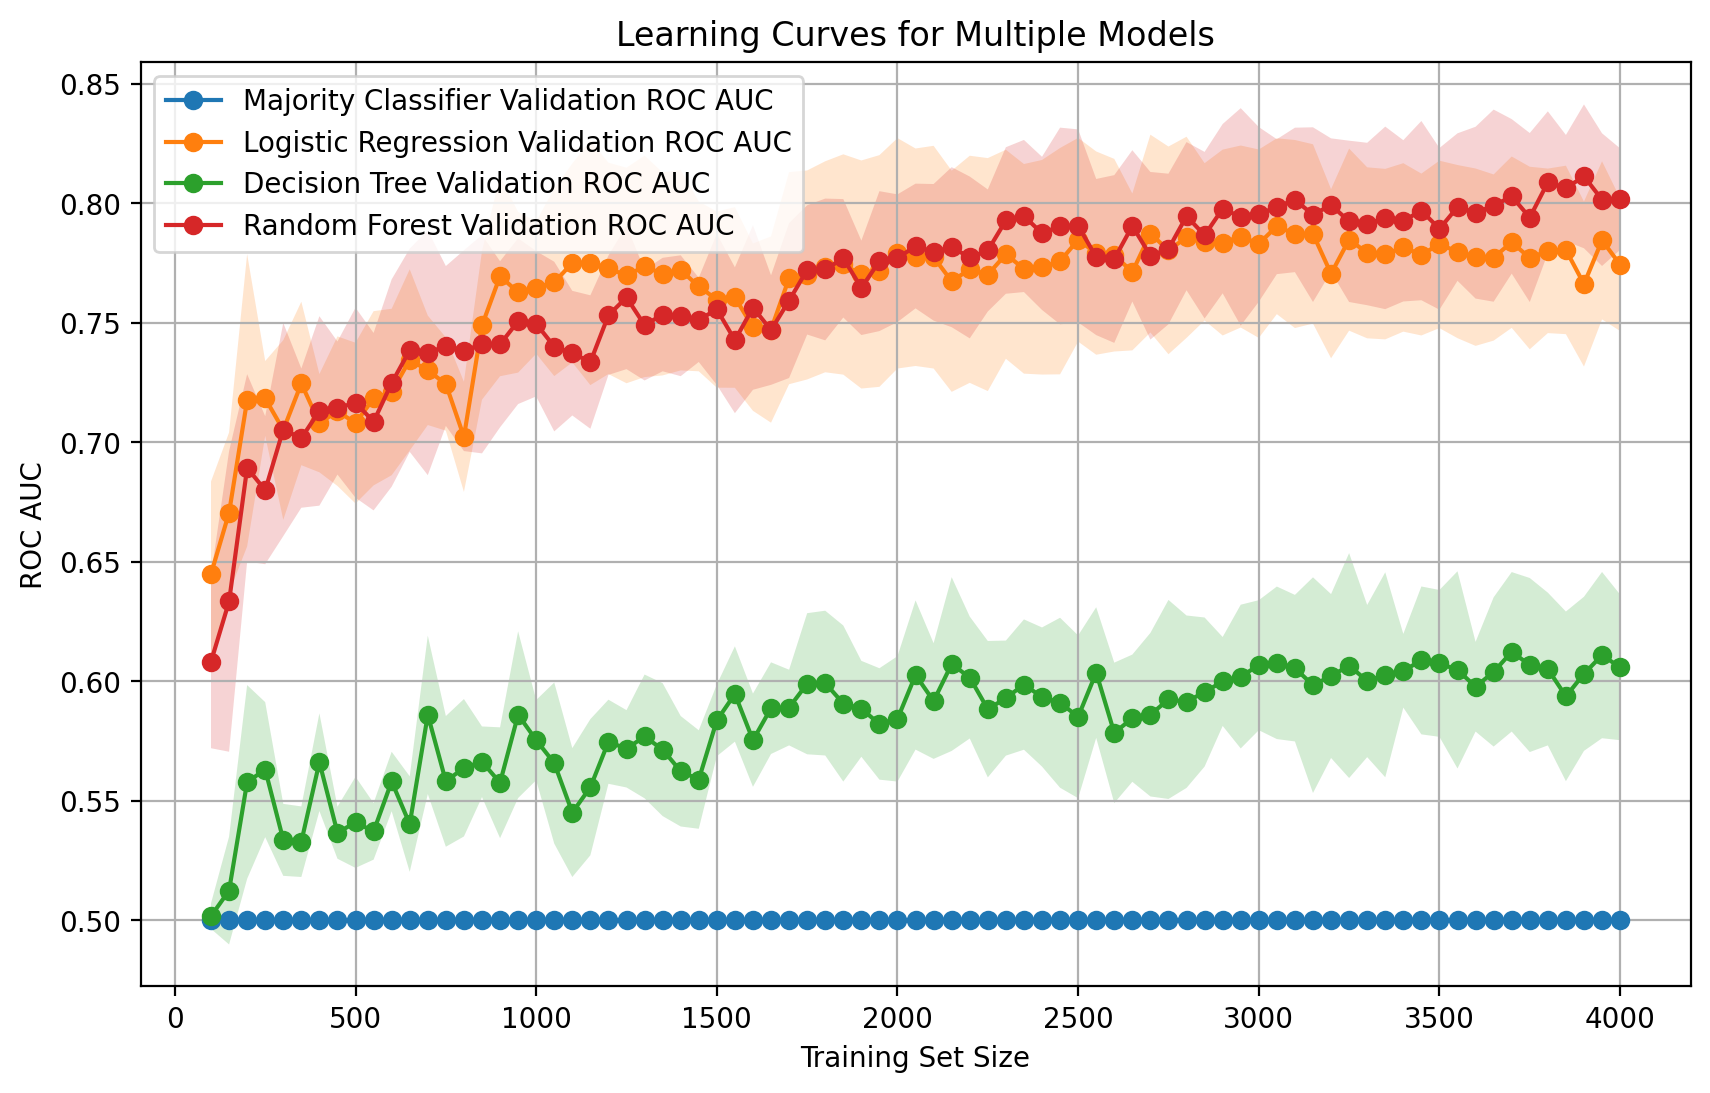

In [37]:
train_cleaned = pd.read_csv('../data/cleaned_train_encoded.csv')
print(len(train_cleaned))

X_train, X_test, y_train, y_test = prepare_data_for_modeling(train_cleaned, False)


    # Prepare and train models
# Tune models
models = prepare_models()

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

def plot_combined_learning_curve(models, X, y):
    plt.figure(figsize=(10, 6))

    train_sizes = np.arange(50, 4050, 50)
    
    for name, model in models.items():
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=train_sizes, scoring='roc_auc')
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, test_mean, marker='o', label=f'{name} Validation ROC AUC')
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    plt.title('Learning Curves for Multiple Models')
    plt.xlabel('Training Set Size')
    plt.ylabel('ROC AUC')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    
plot_combined_learning_curve(models, X_train, y_train)
